# <center> AI Project Submission - Predicting The Price of Bitcoin </center>

![bit_image](Images/bitarrow.jpg)

## Table Of Contents:
* [About The Project](#About-The-Project)
    * [Problem Definition](#Problem-Definition)
    * [The Problem with Randomness](#The-Problem-with-Randomness)
    * [Acknowledgements](#Acknowledgements)
    * [Coding Details](#Coding-Details)
    * [Set-Up](#Set-Up)
    * [The Upshot](#The-Upshot)
* [Diving into the data](#Diving-into-the-data)
    * [Train-Test Split](#Train-Test-Split)
* [Setting a Benchmark](#Setting-a-Benchmark)
    * [Single-Point Random-walk](#Single-Point-Random-walk)
    * [Full-Interval Random-walk](#Full-Interval-Random-walk)
* [Learning From History](#Learning-From-History)
    * [LSTM](#LSTM)
    * [Training and Testing](#Training-and-Testing)
    * [Manipulating Features](#Manipulating-Features)
    * [Conclusions](#Conclusions)
* [Finding Predictive Features](#Finding-Predictive-Features)
    * [Describing the Pipeline](#Describing-the-Pipeline)
    * [Cryptocurrency Prices](#Cryptocurrency-Prices)
    * [Stocks Prices](#Stock-Prices)
    * [Commodity Prices](#Commodity-Prices)
    * [Google Trends](#Google-Trends)
    * [Final Analysis](#Final-Analysis)
* [Summary](#Summary)
    * [Our Experiments](#Our-Experiments)
    * [Building the models](#Building-the-Models)
    * [Future Work](#Future-Work)
    * [Closing Remarks](#Closing-Remarks)

## About The Project <a class="anchor" id="About-The-Project"></a>

If you've been living under a rock for the last couple of years and don't know what Bitcoin is, go to [Wikipedia][1] to find out. Afterwards, you should google "Donald Trump", you're not gonna believe it.

The only thing better than getting a score of 100% on your AI-project, is to discover a way to make money with said project. Since Bitcoin is all the rage lately (["it's blockcain, not Bitcoin"][2], we know) we decided to use AI-methods to try and predict the future, or at least the future price of Bitcoin. Thus, getting rich.

AI is (by some definitions) an all-encompassing phrase for algorithms which "learns" to discover patterns in data. In this project, we tried using algorithms for time-series forecasting to see if we can identify **predictive** parameters for the price of Bitcoin.

In the next sections we'll present the data, the models, the analysis, and the conclusions. Spoiler alert: we [still ain't rich][3]

[1]: https://en.wikipedia.org/wiki/Bitcoin
[2]: https://medium.com/@jimmysong/why-blockchain-is-not-the-answer-3b7d5f612d11
[3]: https://www.youtube.com/watch?v=zdEYyPasjho


### Problem Definition <a class="anchor" id="Problem-Definition"></a>

The [Butterfly effect][8] is a term from chaos theory that's usually simplified as the following saying: "The flap of a butterfly’s wings in Brazil can set off a tornado in Texas". So, if we can track the butterflies in Brazil, and correctly map the connection between their flaps and tornados, maybe we can save lives in Texas.

That's preposterous, of course. But it's an example of the type of problem we want to tackle. Given all kind of *historical* observations, we want to model the connection between those observations and the price of Bitcoin (if such connection even exist), and use that model to predict what the future price of Bitcoin will be. This type of models is known as [Time Series Forcasting][7].

In mathematical terms, if $\mathcal{H}=\{h^1,h^2...\}$ is a set of fetures, $(p_1,...p_t)$ is the price of Bitcoin in time $(1,...,t)$ and $(h^i_1, h^i_2...h^i_t)$ is the series of observations of feature $h^i \in \mathcal{H}$ in time, we would like to find a function (a model) $\mathcal{M}$ s.t. $$\mathcal{M}((h^i_1, h^i_2...h^i_t)_{h^i \in \mathcal{H}}) = p_{t+n}, \ \ n \in \mathbb{N}$$

Since we can't formalise and model all the data in the world (not yet, at least), we're gonna use a hand-picked selction of features, look at the historical data (with a single day as the time interval) and try to come up with a model as acurate as possible.


### The Problem with Randomness <a class="anchor" id="The-Problem-with-Randomness"></a>

We should mention that random variables are used throughout the notebook. We tried not to mention specific values in the documentation in order to avoid discrepancy between different runs, and avaraged over several runs where necessary. Still, notes about curve shapes and similar details are based on the output we saw ourself (we didn't fixed a constant random seed in order not to compromise the integrity of the results).


### Acknowledgements <a class="anchor" id="Acknowledgements"></a>

While researching the idea for this project (basically looking for usefull code snippets), we quickly realized that we're [hardly][9] [the][10] [firsts][11] to think of the briliant notion of using historical data to predict Bitcoin prices. Most prominently, **David Sheehan** addressed the idea in his [excelent blog][4]. We used some code snippets from the library he developed ([cryptory][5]) to retrieve and process the data, and used some of his posts as guidence and references, but still made it a point to build our own model, to run the experiments ourself, and to reach our own conclusions.

Other blog-posts, articles and illustrations which came handy are scattered in the following sections. We tried to give credit where it's due, but here it's suffice to thank the great online community devoted to teach, explain, and show examples of algorithms and models. And of course, the biggest thanks goes the TA and the course staff who set us on the path of this interesting and teachable project.

[4]: https://dashee87.github.io/
[5]: https://github.com/dashee87/cryptory)
[7]: https://machinelearningmastery.com/time-series-forecasting/
[8]: https://en.wikipedia.org/wiki/Butterfly_effect
[9]: https://towardsdatascience.com/predicting-prices-of-bitcoin-with-machine-learning-3e83bb4dd35f
[10]: https://sergioskar.github.io/Bitcon_prediction_LSTM/
[11]: https://www.curiousily.com/posts/cryptocurrency-price-prediction-in-tensorflow-2/

### Coding Details <a class="anchor" id="Coding-Details"></a>
In order to retrieve and manage the data, we created the `DataLoader` class in [DataLoading.py](./DataLoading.py). All the function for visualisation (using `mathplotlib` and so on) are implemented in [visualise.py](./visualise.py).

At start, we used the `cryptory` library mentioned above, but later on realised it has some issues and doesn't quite fit to our needs, so we created our on data-loading class.

We had some difficulties optimizing libraries such as `mathplotlib` and `tensorflow` for the noyebook format, but nothing that thorough search of stackoverflow couldn't resolve. 

### Set Up <a class="anchor" id="Set-Up"></a>

To set up your enviourment you can use the accompanied [requirements](./requirements.txt) file or use `pip install -r requirements.txt --upgrade` to install the specified packages.

To visualize the graph we used the `graphviz` package which need to be installed with it's binaries in PATH. In addition to `pip install graphviz` use `conda install graphviz` and then add `<path to anaconda environment>\Library\bin\graphviz\` to PATH (use similar commands if you don't use conda).


### The Upshot <a class="anchor" id="The-Upshot"></a>

This project will follow the standard pipeline of AI-based solutions. First, we'll retrieve the data and have a preliminary look. Then, we’re going to employ a Long Short Term Memory (LSTM) model and test it against other benchmarks in order to examine the hypothesis that we can predict the Bitcoin price based on it's previous preformance. Lastly, we'll consider all kinds of external features and test if they can help predict the price of Bitcoin, and the relationships between the variables in general. So without further ado, let's run some code! 

## Diving into the data <a class="anchor" id="Diving-into-the-data"></a>

All the data retrieved from the following section was scraped online and saved in *cache*-like folder, and can be re-downloaded using `DataLoader`. In all cases, whenever there wasn't data available (for example: stock prices on weekendes) we used the last available data-point as the value for that day (e.g. the price of the stock through the weekend is its price on thursday).

While the sources we used only give a daily snapshot of the openeing and closing prices (and other features) and not the minute-by-minute price-change, we felt that it should be enough to discover if there's an undelying trend that's worth more granular analysis.

### Train-Test Split <a class="anchor" id="Train-Test-Split"></a>
We decided to set 1.8.14 as the starting date for our time-series data, and in order to avoid time-dependent variations we set 31.7.19 as the last data point.

In order to create accurate test data, we caped the training data at July 2018 and used the price fluctuations of the last year as the test data (i.e. the model will be trained on pre-august-18 data and assessed on data in the range 8/18-7/19)

In [1]:
from DataLoading import DataLoader

start_train = "2014-08-01"
end_train = "2018-07-31"
start_test = "2018-08-01"
end_test = "2019-07-31"

dl = DataLoader([start_train, end_train], [start_test, end_test])

First, let's look at the Bitcoin data. This is our training data, and what we're trying to predict:

In [2]:
train_data, test_data = dl.get_bitcoin_trading_data()
train_data.head(5)

,date,open,high,low,price,volume,marketcap
0,2014-08-01,586.20,597.92,583.63,594.92,18215900,7786796032
1,2014-08-02,594.90,594.91,586.16,589.33,8359080,7716181169
2,2014-08-03,588.89,589.15,581.65,586.67,9917990,7683520602
3,2014-08-04,586.23,591.95,583.74,588.78,9867570,7713117798
4,2014-08-05,589.01,589.86,584.10,585.44,10790800,7671275262


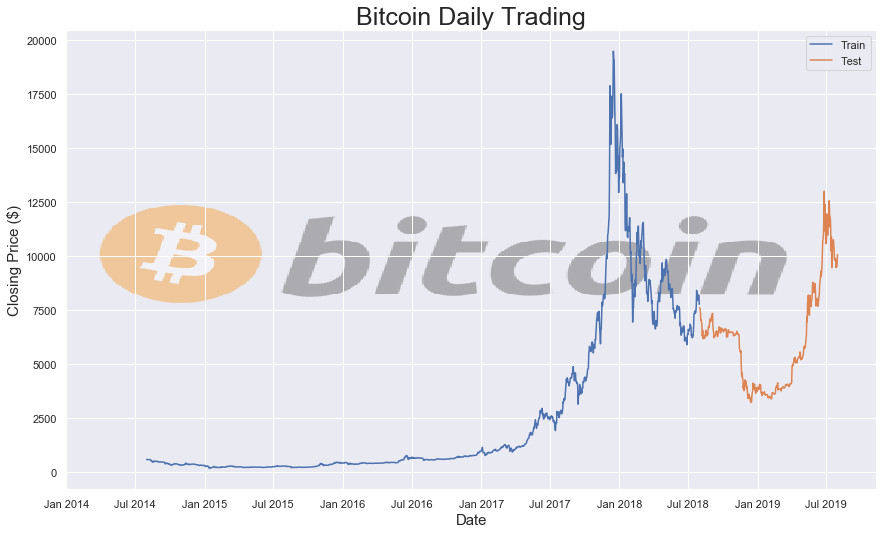

In [3]:
from visualise import *
%matplotlib inline

ax = draw_xdate(train_data[['date', 'price']], im_path=Bitcoin_logo)
draw_xdate(test_data[['date', 'price']], ax=ax,
           ylabel='Closing Price ($)', title='Bitcoin Daily Trading')
ax.legend(['Train','Test'])
plt.show();

To understand the full picture, we'll plot the volume of trading in the described period:

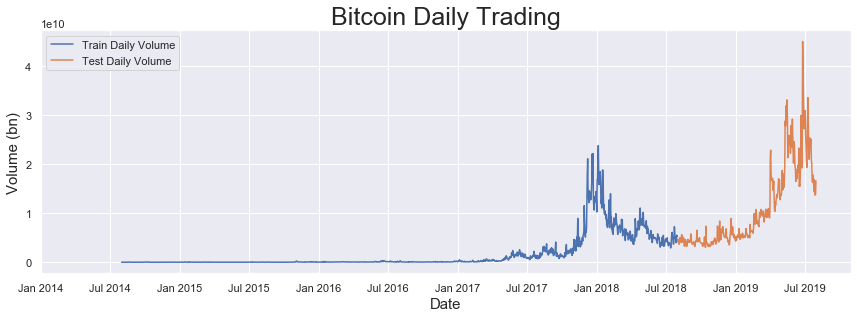

In [4]:
ax = draw_xdate(train_data[['date', 'volume']], size=(12,4))
draw_xdate(test_data[['date', 'volume']],
           ax=ax, ylabel='Volume (bn)', title='Bitcoin Daily Trading')
ax.legend(['Train Daily Volume','Test Daily Volume'])
plt.show()

We can already see the problem emerging. The training period consist of "very long head"; in most of the observed time the Bitcoin was still obscure concept, without much movement in its price or in the volume of trading. This changed around May 2017, where an uptick in price was followed by a down-turn. The test data is visibly different, with rapid changes and a noticeable surge in the price for most of the test period.

This problem will come to bite us later, but for now it's enough to be aware of it.

## Setting a Benchmark <a class="anchor" id="Setting-a-Benchmark"></a>

Before we set to build the greatest ML model the world has ever seen, it is usefull to test out some simple statistical model to serve as benchmarks. It's quite common this days to go down the rabbit hole of deep-learnign, adding more layers and extra features, just to end up with a sophisticated model which under-preform a coin-flip or other kind of random selection.

We'll use MAE (Mean Absolute Error) as our accuracy measurment (and later: the model's loss function), since it captures exactly what we're trying to minimize: the "distance" from the true value.

### Single-Point Random-walk <a class="anchor" id="Single-Point-Random-walk"></a>
In classification problem, the model-of-choise for evaluation is random selection. [Random walk][2] is the closest analog when engaging in time-forecast problems, especially when discussing price projection that resembles the [stock-martet][1].

Random walk (or "Drunkard’s walk") can be formulated as:
$$ Pred(V_t) = V_{t-1} \cdot \epsilon, \ \ \epsilon \sim N(\mu,\sigma) $$

We'll call this model "single-point random-walk" (the meaning of the name will be understood late).

If the change in price does follow the normal distribution, we can claculate $\sigma$ and $\mu$ from the training set and use it to predict the test data. let's test the [hypothesis of normality][3] visualy, using [Histogram][4] and [QQ-plot][5]:

[1]: https://www.investopedia.com/terms/r/randomwalktheory.asp
[2]: https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/
[3]: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
[4]: https://en.wikipedia.org/wiki/Histogram
[5]: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

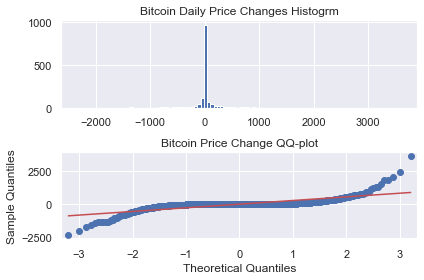

In [5]:
# measuring daily changes in price
diff = train_data['price'].diff()[1:]

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.hist(diff, bins=100)
ax1.set_title('Bitcoin Daily Price Changes Histogrm')

from statsmodels.graphics.gofplots import qqplot
qqplot(diff, ax=ax2, line='s')
ax2.set_title('Bitcoin Price Change QQ-plot')

fig.tight_layout()
plt.show()

Although it's not definitive (some ouliers exist), it's good enough for the purpose of serving as benchmark. Let's see how it does:

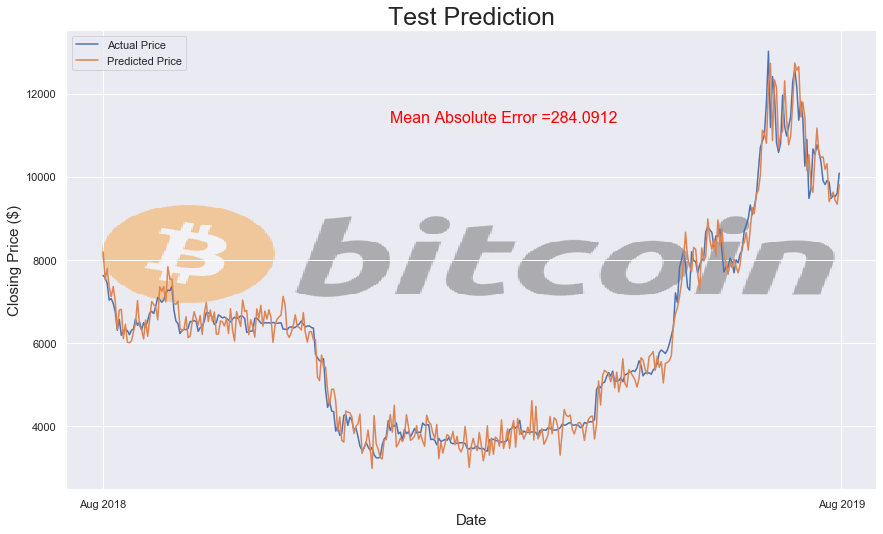

In [6]:
from datetime import datetime as dt
import numpy as np

# estimating the expectation and standard-deviation from train data
est_mean = np.mean(diff)
est_std = np.std(diff)

test_epoch = (dt.strptime(end_test, '%Y-%m-%d') -
              dt.strptime(start_test,'%Y-%m-%d')).days +1

v_t = train_data.iloc[-1]['price']
test_data['shift'] = test_data['price'].shift(fill_value=v_t)

random_walk = np.random.normal(est_mean, est_std, test_epoch)
est_close = test_data['shift']+random_walk
draw_pred_res(test_data[['date', 'price']].assign(pred=est_close), 'Test',
             im_path=Bitcoin_logo)
plt.show()

Looks great! that was easier than we thought. Who need fancy models and difficult math? let's go home. Except, not quite. What this graph shows is **single point** predictions. At every step, we predict the $t+1$ point based on the *true value* of points $t$. But models that only make predictions one point into the future are often misleadingly accurate, as errors aren't carried over to subsequent predictions. No matter how large the error, it's essentially reset at each time point, as the model is fed the true price. It looks nice, but there isn't a real substance beyond it.


### Full-Interval Random-walk <a class="anchor" id="Full-Interval-Random-walk"></a>

Let's look at **full interval** preiction models. where we predict $n$ steps, and the projection fron step $t+1$ is calculated based on the *prediction* for step $t$. In this case, errors from previous predictions aren't reset but rather are compounded.

The updated formula is:
$$ Pred(V_t) = Pred(V_{t-1}) \cdot \epsilon, \ \ \epsilon \sim N(\mu,\sigma) \ \wedge \  Pred(V_0)=V_0 $$

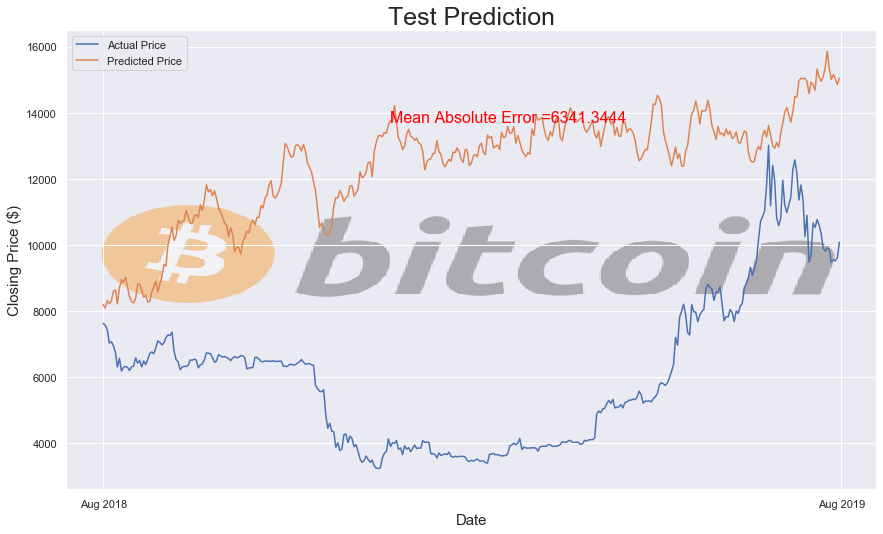

In [7]:
est_close = np.full(len(random_walk), v_t) + random_walk.cumsum()
draw_pred_res(test_data[['date', 'price']].assign(pred=est_close), 'Test',
             im_path=Bitcoin_logo)
plt.show()

In conclusion: the single-point prediction model is doing a reasonable job. Occasionally it's out, but in general it follows the true data quite well. However, the predictions do appear far more volatile (the graph contain more sharp and constant changes) than the true data.

When predicting many steps forward however, the model doesn't work as well. It fails to predict the some of the trends (although isn't that far off in the overall direction) and suffer from quite high error rate.

Still, we got ourself a benchmark. Now, let's build a model to beat it.

## Learning From History <a class="anchor" id="Learning-From-History"></a>

![Solomon](Images/nothing_new.jpg)

To the naked eye, it seems like the price of Bitcoin have no rhyme or reason, and in particular, absent any internal traceable logic. but that's where ML comes in (and in our case: [time-series forecasting][1]). maybe the historical data contain some usefull information about the future, and maybe we can build a model to detect it

[1]: https://www.datascience.com/blog/time-series-forecasting-machine-learning-differences

### LSTM <a class="anchor" id="LSTM"></a>

When dealing with [time-series forcasting][1], the LSTM model (first presented [here][2]) is considered the state-of-the-art, and regulary out-preform all other models in prediction and recognition tasks. If you want the deep-dive into LSTM, we reccomend [this][3] blog post, or [this][4] one which is more mathmetical, or simply search the term on google. (we also took a look at [Bayesyan models][5] and [Prophet][6] but it was our understading that LSTM is best suited to tackle the problem. if you **really** want a deep dive into the various models, [go nuts][7]).


We're not gonna give the complete presentation of LSTM. it involves a lot of math (bahhh), and require basic understanding of Neural-Networks and familiarity with concepts like "activation function", "vanishing gradients" and such. We'll assume a bit of prior knowledge from the reader, and present here the LSTM model itself, without the prerequisite introductions. The descriptions ant illustrations are taken from [this][8] and [this][9] blog posts, which gives an excellent overview of RNN's and LSTM.

#### Rcurrent Neural Networks

RNN's are the most popular method of performing classification and other analysis on *sequences* of data, such as language, stock prices, electricity demand and so on. Unlike feed-forward networks, the output of the hidden layer in a recurrent neural network is fed back into itself. the output of a neural network layer at time t is fed back as the input of the same network layer at time t + 1. It looks like this:

![RNN](Images/simple_rnn.jpg)

During training and prediction, the RNN moves between "states" with time, where the output of the previous state $h_{t-1}$ and the input of the current state $x_t$ determine the output $h_t$. This is what it looks like if we "unroll" the network through time:

![SEQ](Images/unrolled.jpg)


#### The Problem with RNN

The problem with vanilla recurrent neural networks, constructed from regular neural network nodes, is that as we try to model dependencies between sequence values that are separated by a significant number of other values (i.e. they are distant from each other), we experience the vanishing gradient problem (and also sometimes  the exploding gradient problem). This is because small gradients or weights are multiplied many times over through the multiple time steps, and the gradients shrink asymptotically to zero. This means the weights of those earlier layers won’t be changed significantly and therefore the network won’t learn long-term dependencies.


#### The LSTM Cell

A LSTM network is a kind of recurrent neural network, designed to deal with this problem. they're recurrent neural network that has LSTM cell blocks in place of our standard neural network layers. Here is a graphical representation of the LSTM cell:

![LSTM](Images/lstm_Cell.jpg)

Notice first, on the left hand side, we have our new sequence value $x_t$ being concatenated to the previous output from the cell $h_{t-1}$. The first step for this combined input is for it to be squashed via a $tanh$ layer. The second step is that this input is passed through an **input gate**. An input gate is a layer of $sigmoid$ activated nodes whose output is multiplied by the squashed input. These input gate sigmoids can act to “kill off” any elements of the input vector that aren’t required. A sigmoid function outputs values between 0 and 1, so the weights connecting the input to these nodes can be trained to output values close to zero to “switch off” certain input values (or, conversely, outputs close to 1 to “pass through” other values).

The next step in the flow of data through this cell is the internal state / **forget gate** loop. LSTM cells have an internal state variable $s_t$. This variable, lagged one time step i.e. $s_{t-1}$ is added to the input data to create an effective layer of recurrence. This addition operation, instead of a multiplication operation, helps to reduce the risk of vanishing gradients. However, this recurrence loop is controlled by a forget gate – this works the same as the input gate, but instead helps the network learn which state variables should be “remembered” or “forgotten”.

Finally, we have an output layer $tanh$ squashing function, the output of which is controlled by an **output gate**. This gate determines which values are actually allowed as an output from the cell $h_t$.


### Building Our Model <a class="anchor" id="Building-Our-Model"></a>

We'll use the [Keras][11] package for deep learning to build our model.

Our model is composed of 2 LTSM-->Dropout Layers, followed by Dense-->Activation layers for creating one-dimensional outputs value (prediction). Run the code to see an illustration of the layers.

We chose the standard structure of similar neural-networks (2 hidden layers [with dropout][12] and a fully connected layer). Changing the number of layers, the configuration, adding more regularization etc. could possibly improve the results, but this is a bottomless pit, and is more suitable for an exercise in [Neural Architecture Search][10], which is a deviation from what we're focusing on here.

#### Hyperparameters

We set the number of `neurons=50` in each LSTM layer to keep runtime reasonable on CPU , `activation_function=tanh`, `dropout=0.25` (standard practice) is the precentage of neurons we "drop" at each dropout layer. We used the `adam` [optimizer][14]

All this hyperparameters could be optimize with [various techniques][13]. We didn't spent much time on tweaking them (other than a few manual runs that showed no noticeable difference), since this kind of experiments can be very time and resource consuming and result in minor impvorments, which we believed will only be necessary if and when we have a good model that only needs some fine-tuning.

[1]: https://machinelearningmastery.com/time-series-forecasting/
[2]: http://www.bioinf.jku.at/publications/older/2604.pdf
[3]: http://colah.github.io/posts/2015-08-Understanding-LSTMs/
[4]: http://blog.echen.me/2017/05/30/exploring-lstms/
[5]: https://www.datascience.com/blog/introduction-to-bayesian-inference-learn-data-science-tutorials
[6]: https://towardsdatascience.com/forecasting-with-prophet-d50bbfe95f91
[7]: http://www.statsoft.com/textbook/time-series-analysis
[8]: https://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
[9]: https://adventuresinmachinelearning.com/keras-lstm-tutorial/
[10]: https://en.wikipedia.org/wiki/Neural_architecture_search
[11]: https://keras.io/
[12]: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
[13]: https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568
[14]: https://arxiv.org/abs/1412.6980

Using TensorFlow backend.


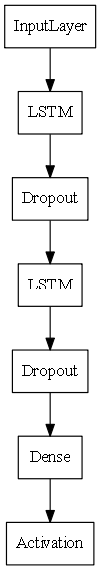

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM, Dropout
from keras.utils import plot_model
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def build_model(input_shape, output_size=1, neurons=50, activ_func='tanh',
                dropout=0.25, loss='mae', optimizer='adam'):
    """
    input_shape: shape of the input for the filrst layer
    output_size: output of the last dense layer
    neurons: number on neurons in each LSTM layer
    activ_func: string. activation function (Keras styls)
    dropout: precentage of neurons to "drop" in droput layers
    loss: loss function
    optimizer: string. model's optimizer (Keras style)
    """
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape, return_sequences=True,
                   activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

model = build_model((10,10)) # dummy model, just to show structure
plot_model(model, show_layer_names=False, show_shapes=False, dpi=85)

#### Window Size

As exaplined, the LSTM model have a set number of "memory cells" (states) that feed into each other. The number of those "cells" determine how many of the previous inputs the model have access to in any given iteration ("the length of it's memory"). In our case, the window-size is the number of previous days which are present "in memory".

As always in machine-learning, there's [quality-efficiency trade-off][1] in setting the window size. Bigger window means the model can utilize information from earlier inputs and detect complex long term behaviours, but with a cost to preformance. Rather arbitrarily (can be subject to hyper-parameters optimization), we set `window_len=10`.

#### Basic Features

First, we'll have to define our features. Before we try any convoluted ideas, we'll try-out the most basic features: the price itself and the volume of trading. When ignoring all other features and potential noise, we're just testing if our model can detect any pattern in the changes of the price itself. Later on, we'll add some hand-crafet features and check if those improve the model's accuracy.

### Training and Testing <a class="anchor" id="Training-and-Testing"></a>

Let's train our model for 25 epochs, and see how it does.

We tried different batch sizes and discovered that smaller is better, so we opt to update the parameters after each example, meaning `batch_size=1`.

During all the trial-runs, the loss function stabilizes after ~10 iterations, so we set the number of training epochs to 25, for good measure.

[1]: https://scholarworks.umass.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1005&context=jitpc2011

Loading From Path: Model no.  1


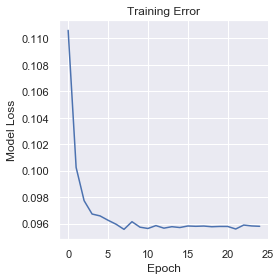

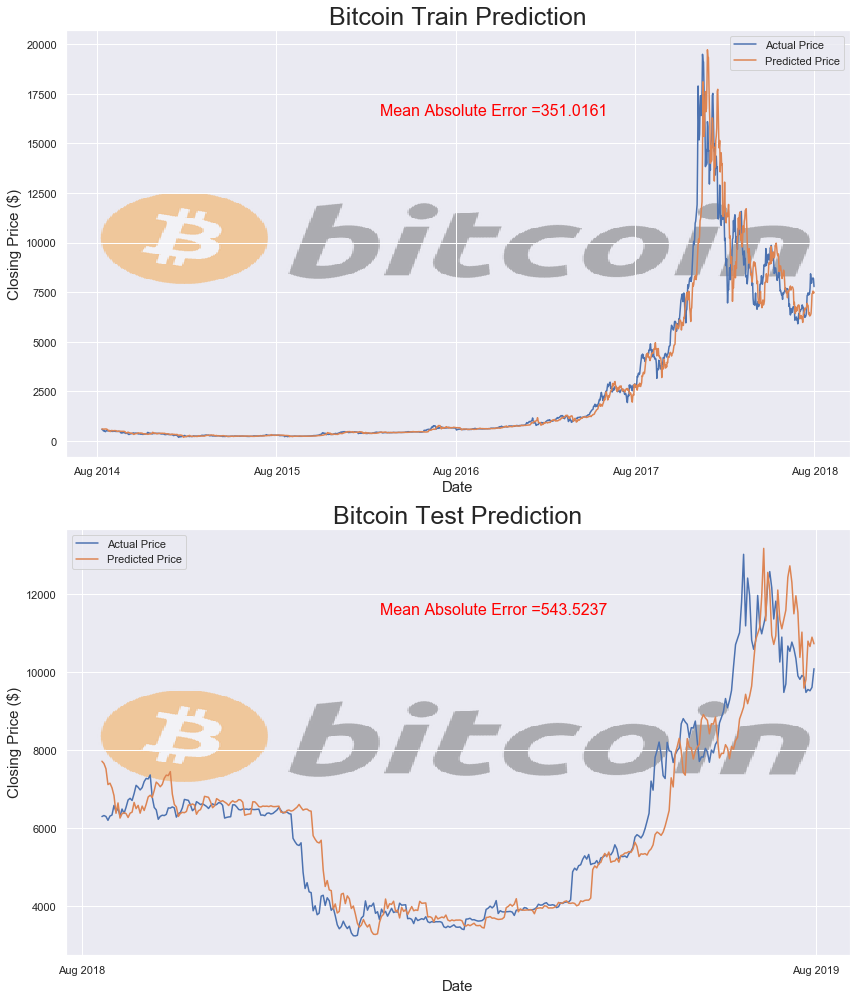

In [9]:
from keras.models import load_model
import pickle

window_len=10
num_epochs = 25
size_batch = 1

# function for creating X,y (feature vectors, lables) for train and test
def create_xy(dataset, norm_cols=False, pred_col='price'):
    """
    dataset: the data to transform
    norm_cols: whether to normalize before feed forward
    pred_col: the name of the lables column         
    """
    
    inputs = []
    for i in range(len(dataset) - window_len):
        # creating window_len-size dataframe
        temp = dataset[i:(i + window_len)].copy()
        if norm_cols:
            # normalizing to the first elemnt in the frame
            temp = temp.apply(lambda col: col/col.iloc[0]-1)
        inputs.append(temp.to_numpy())
    
    outputs = (dataset[pred_col][window_len:].values / 
               dataset[pred_col][:-window_len].values) - 1

    return np.array(inputs), outputs

model_dir = 'Models'
num_rounds = 10 # default number for the number of built models
actual_test = test_data['price']

# function for the full pipline of building, training, and evaluating a model
# this function saves all created models automitaclly, and will only train
# a new model if the experiment name isn't already in path
def build_train_predict_multiple_models(train_data, test_data, prefix,
                                        norm=True, num_of_models=num_rounds,
                                        verbose_models=[1], im_path=None): 
    """
    train_data: df
    test_data: df
    prefix: name of the experiment (relevant for saved files names)
    norm: whether to normalize the features
    num_of_models: how many models to build and evaluate
    verbose_models: list. for which models to verbose massages and visuals
    """
    
    # helper function for setting experiment name
    get_name = lambda i: \
    f"{prefix}_{i}_epochs={num_epochs}_batch-size={size_batch}_norm={norm}"
    
    train_X, train_Y = create_xy(train_data.drop(columns='date'), norm)
    test_X, _ = create_xy(test_data.drop(columns='date'), norm)
    
    pred_list = []
    for i in range(1,num_of_models+1):
        model_path = os.path.join(model_dir,get_name(i))
        res_file = os.path.join(model_path, 'training.res')
        model_file = os.path.join(model_path, 'model.lstm')
        verbose = i in verbose_models
           
        if not os.path.exists(model_file):
            # train new model if not already exist
            print('Building And Training: Model no. ',i)
            model = build_model(train_X.shape[1:3])
            train_res = model.fit(train_X, train_Y, epochs=num_epochs,
                                  batch_size=size_batch, shuffle=True,
                                 verbose=int(verbose))
            if not os.path.exists(model_path):
                os.makedirs(model_path)
            pickle.dump(train_res, open(res_file, 'wb'))
            model.save(model_file)
        else:
            # load existing model
            print('Loading From Path: Model no. ',i)
            model = load_model(model_file)
            train_res = None
            
        est_test = ((np.transpose(model.predict(test_X))+1) * 
                     test_data['price'].values[:-window_len])[0]
        pred_list.append(est_test)
        
        if verbose:
            # print training error and evaluation visuals
            if train_res is None:
                train_res = pickle.load(open(res_file, 'rb'))
            plot_training_error(train_res)
            
            fig, (ax_train, ax_test) = plt.subplots(2,1, figsize=(12,14))
            est_train = ((np.transpose(model.predict(train_X))+1) * 
                        train_data['price'].values[:-window_len])[0]
            draw_pred_res(train_data[['date', 'price']][window_len:]\
                          .assign(pred=est_train), prefix + ' Train', ax_train,
                         im_path=im_path)
            draw_pred_res(test_data[['date', 'price']][window_len:]\
              .assign(pred=est_test), prefix+' Test', ax_test, im_path=im_path)
            fig.tight_layout()
            plt.show()
    return pred_list
            
Bitcoin_features = ['date', 'price', 'volume']
_ = build_train_predict_multiple_models(train_data[Bitcoin_features],
                      test_data[Bitcoin_features], 'Bitcoin', False, 1 ,[1],
                                       Bitcoin_logo)

This kinda sorta maybe looks like something. From the loss-graph we can see that our model error stabilizes after very few epochs. This is consistent with the fact that we don't have too much training data (in terms of BIG data) and few features (just 2). the model has an exeptable generalization error, and it tracks to the real price curve quiet closely, but still not good enough. Let's see if we can improve it.

### Manipulating Features <a class="anchor" id="Manipulating-Features"></a>

Since we don't want to mess around with model itself, let's tweak our training inputs and see where we get.

#### Stationary Data

A time series is considered stationary if its statistical properties (mean, variance, etc) are invariant with time. In simple terms, the mean/variance/etc of all subsamples should be approximately identical. A stationary process is quite useful for forecasting: as it contains no trends or longer term changes, knowing its value today is sufficient to predict its future values. You can read more on the subject [here][2]

As we've seen when we ploted our data, Bitcoin prices aren't stationary. A 10-days window in july 2014 has a very different mean and variance than its counterpart in august 2018. To combat this, we will take each window of training/testing data and normalize each one to reflect percentage changes from the start of that window (so the data at point i=0 will always be 0)

After we normalise the data, we can use a statistical significance test, particularly the [Augmented Dickey–Fuller test][1], to confirm that it's stationary. Let's see if normalization is enough:

[1]: https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
[2]: https://machinelearningmastery.com/time-series-data-stationary-python/

BEFORE NORMALIZATION:


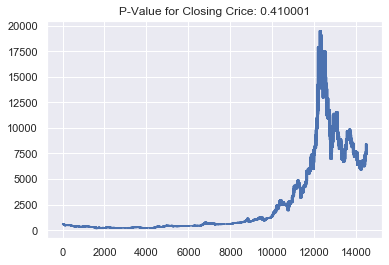

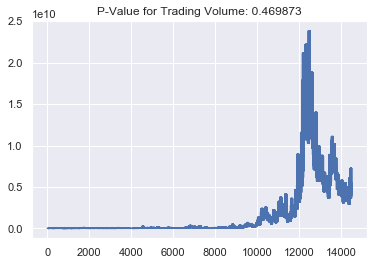

AFTER NORMALIZATION:


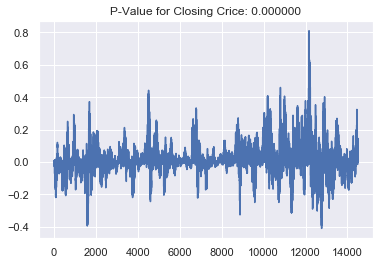

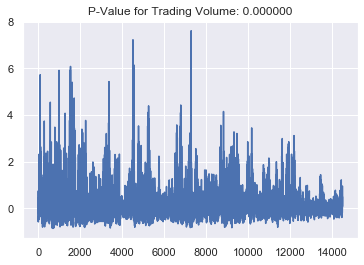

In [10]:
print("BEFORE NORMALIZATION:")
# creating data withoout normalization
train_X, _ = create_xy(train_data[Bitcoin_features].drop(columns='date'),
                       False)
plot_adf(train_X)

print("AFTER NORMALIZATION:")
# creating data with normalization
train_X, _ = create_xy(train_data[Bitcoin_features].drop(columns='date'), True)
plot_adf(train_X)

As we can see from the graphs above, the data is now stationary. When adding more features, we'll make sure they meet the same condition.


#### More Historical Features

Noe let's add more features of the Bitcoin trading-data as training features. We've used the 'high' and 'low' columns to introduce two new features:

The *offset* column represents the gap between the closing price and price high for that day, where values of -1 and 1 mean the closing price was equal to the daily low or daily high, respectively. The *volatility* column is simply the difference between high and low price divided by the opening price.

Loading From Path: Model no.  1


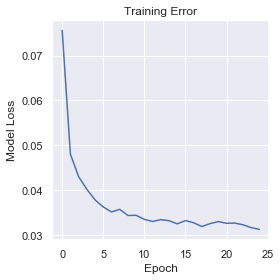

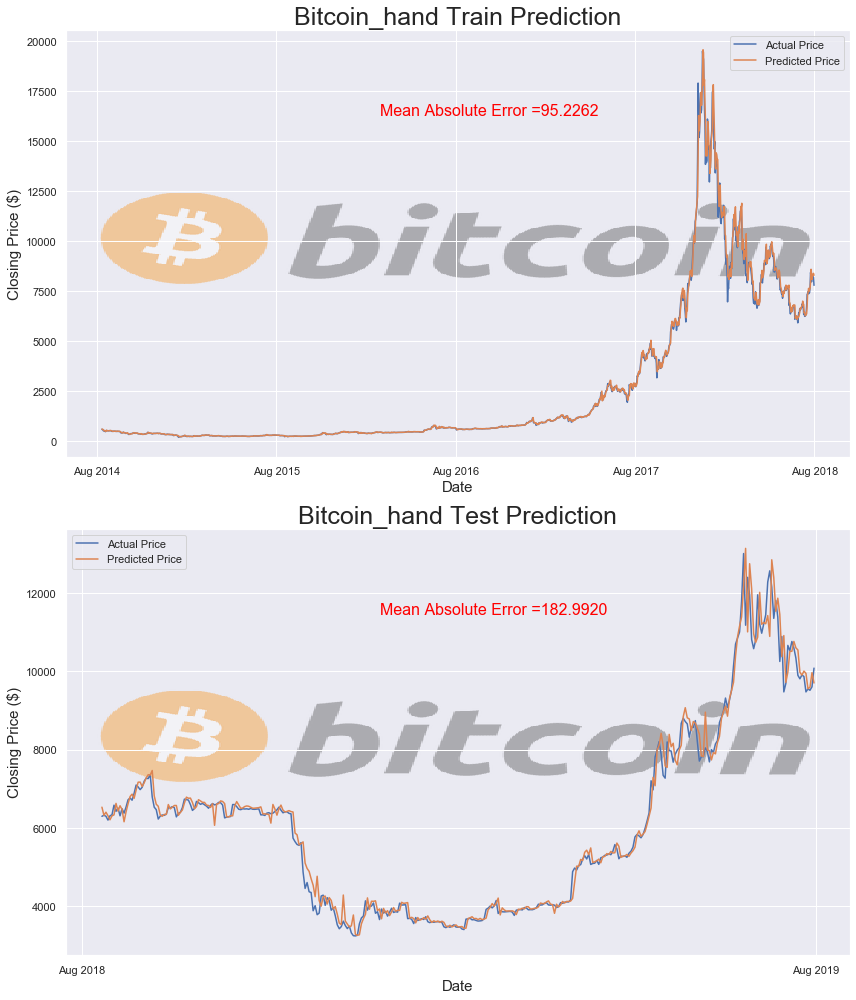

In [11]:
# defining new features from existiong data
kwargs = {'offset': lambda x: 2*(x['high']-x['price'])/(x['high']-x['low'])-1,
        'volatility': lambda x: (x['high']-x['low'])/x['open']}
train_data = train_data.assign(**kwargs)
test_data = test_data.assign(**kwargs)

updated_features = Bitcoin_features+list(kwargs.keys())
pred_test = build_train_predict_multiple_models(train_data[updated_features],
                      test_data[updated_features], 'Bitcoin_hand',
                                        True, 1 ,[1], Bitcoin_logo)[0]

Now that's more like it. We can see that the model took longer to train (more features = more data points = longer training), even though we tried cutting the number of epochs, and the result stayed largly the same.

To the naked eye, our model has improved significantly. It has difficulty recognizing sudden and sharp turns in the market, but it usually on-point with the overall trend. We can see in the later part of 2018 a couple of rapid rise-and-fall (or fall-and-rise) "bumps" which our model completely misses, but those could possibly be attributed to external forces that maybe we can't predict.

### Conclusions <a class="anchor" id="Conclusions"></a>

Making the data stationary obviusly helped, so we'll use this technique from now on. the additional features also contributed to the improvements, though on a much smaller scale (we checked separately, not shown here), so we'll only go through the trouble for a well-to-do model that just need an extra "oomph".


#### Comparing to Benchmarks

By the numbers, we got ourself a half-decent model. This isn't that suprising, because the LSTM model is only making a single-point predictions, with the real values constantly updating. As we saw earlier, even a random model of this type can be quiet accurate.

Let's see how it fares against a single-point random-walk model. Since the random-walk predictions are extremely sensitive to the random seed used for sampling, and we want a reliable (and somewhat replicable) benchmark, we'll run the random-walk sampling and predcition process 10 times and use the avarage MAE as the official mark-to-beat. The LSTM is also sensitive to the random seed (used for initializing the weights), so whenever we'll estimate its preformance, we'll also take an average of 10 models as the measurement.

Loading From Path: Model no.  1
Loading From Path: Model no.  2
Loading From Path: Model no.  3
Loading From Path: Model no.  4
Loading From Path: Model no.  5
Loading From Path: Model no.  6
Loading From Path: Model no.  7
Loading From Path: Model no.  8
Loading From Path: Model no.  9
Loading From Path: Model no.  10


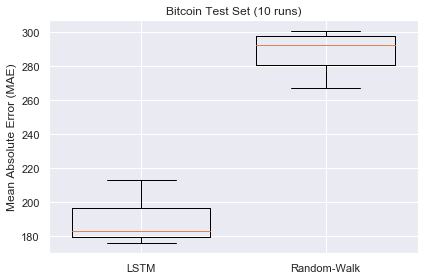

In [12]:
get_mae = lambda preds, actual: \
    [np.absolute(np.array(pred - actual)).mean() for pred in preds]

pred_test = build_train_predict_multiple_models(train_data[updated_features],
                                                test_data[updated_features],
                                                'Bitcoin_hand',
                                                verbose_models=[])
hist_mae = get_mae(pred_test, actual_test[window_len:])

random_mae = []
for _ in range(num_rounds):
    random_walk = np.random.normal(est_mean, est_std, test_epoch)
    est = test_data['shift']+random_walk
    random_mae.append(np.absolute(np.array(actual_test - est)).mean())

plot_boxplot([hist_mae, random_mae], ['LSTM', 'Random-Walk'])

We beat the random model, Hooray! But before we mail-it-in and start betting on crypto, let's dive a little bit deeper to see if we actually broke the mathmetical structure of Bitcoin.

#### What it Really Means

The notable gap between the model's accuracy on the training and test set implies large *Generalization Error*, which can be combated with regularization techniques (such as more aggresive Dropout) and feature manipulation. But if we look at the graph closely, we'll see another explanation: The model doesn't actually "learn" anything. The predicted price regularly seems equivalent to the actual price just shifted one day later.

Let's look at a close-up of the last 31 days in the test data (July 2019) to illustrate this point:

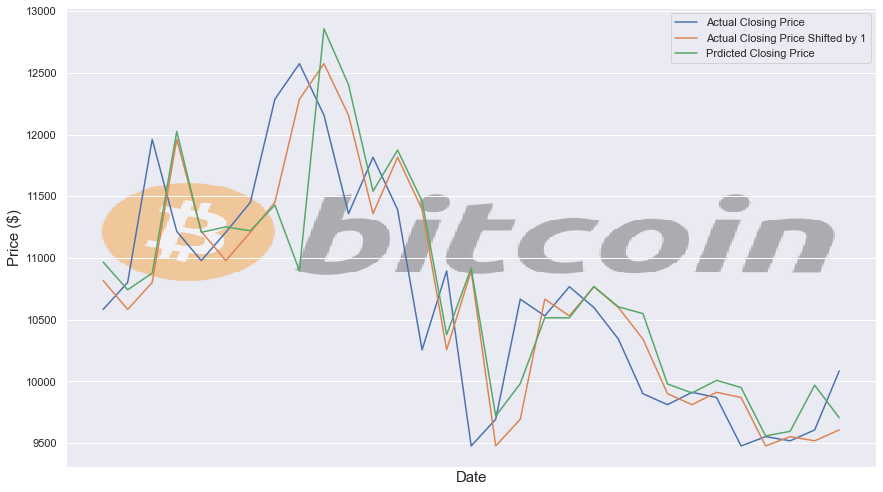

In [13]:
july_test = test_data[['date','price', 'shift']].iloc[-31:].\
                assign(pred=pred_test[0][-31:])
ax = draw_xdate(july_test, ylabel = 'Price ($)', im_path=Bitcoin_logo,
                years=[2019], months=[])
ax.legend(['Actual Closing Price', 'Actual Closing Price Shifted by 1',
           'Prdicted Closing Price'])
plt.show()

Our fancy deep learning LSTM model is simply a linear regression, where the predicted price is the weighted sum of the previous `window_size` values. Even this description is a little bit too fancy, since the graph comparasion between the prediction-series and the value-series shows that the model resembles a *lag model*, where $p_t = p_{t-1} \ \ n \in \mathcal(N)$. Let's wee what will be the MAE for the lag model where $n=1$:

In [14]:
abs_error = test_data['price'].diff().abs().sum()
mae = abs_error / (test_data.shape[0]-1)
print(f'MAE: {mae:.4f}')

MAE: 161.7775


Well, basically we could've bet that the price today will be the same as yesterday, and we'll get an equally good (or better) prediction model.

#### History is Not Enough

As we've seen, our model is basically spitting out the last day's price with some noise, falls just short of a simple lag-model in terms of accuracy, and calls itself "deep learning LSTM model". The Chutzpah on him.

Notice also that our model is a single-point predictor, i.e. we update the real value of the previous step before predicting the current one. We can try and build a full-interval model, but the point here wasn't to see how wrong the model is, but to try and discover hidden pattern in the data over time. It turns out, there isn't such pattern. At least not one that our LSTM model can detect. what the model did discover is the simple observation that Bitcoin prices tend to relative minor daily changes, so some weighted versions of last days price is the best guess for today's.

We can try and improve the model (more layers, wider layers, the best layers) but we seriously dout whether it'll make a different, since we're still subject to the garbage-in-garbage-out rule. The price of Bitcoin is not a law of nature that is likely to have some *Golden Ratio* to explain its fluctuations, but rather a humen-controled convention. One that is more likely to be influenced by what [Elon Musk tweets][1] and [other][2] [human][3] [factors][4] than some predetermined trend.

[1]: https://www.forbes.com/sites/billybambrough/2019/04/29/move-over-Bitcoin-and-dogecoin-elon-musk-is-tweeting-about-Ethereum/
[2]: https://www.investopedia.com/articles/investing/052014/why-Bitcoins-value-so-volatile.asp
[3]: https://www.barrons.com/articles/Bitcoin-price-drop-bakkt-51569365796
[4]: https://www.forbes.com/sites/billybambrough/2019/08/06/is-this-the-real-reason-Bitcoin-suddenly-soared/#7e83fd954380

## Finding Predictive Features <a class="anchor" id="Finding-Predictive-Features"></a>
![cor_image](Images/corelation.png)

Our examination of the Bitcoin data have proved fruitless, so it's time to expand the scope a little bit.

Wer'e gonna try to find predictors, i.e. outside features that are realted to the changes in Bitcoin's price. It makes sense to assume that the price of Bitcoin is influenced by outside features, such as the stock market, the public's engagment, etc. We're going to test if we can identify those features and incorporate them into our model to achieve better results.

#### Correlation $\not=$ Causation

[Correlation does not imply causation][1] is a [statistics mantra][4] so famous, it got its [own T-shirt][3]. If you still aren't sure of the difference, go [here][5] or [here][6]. simply put, [Sex doesn't make you rich][7] and the [best site on the web][2] can introduce you to various correlations which are definitely nonsense.

We aren't looking for a graph that looks similar to the one of Bitcoin's price but rather for a better prediction. For this reason, in addition to analysing the correlation between the selected features and the price of Bitcoin, we'll re-train our model to see if we get a better prediction.


### Describing the Pipeline <a class="anchor" id="Describing-the-Pipeline"></a>
Since the execution is repetitive for the different examined features, we'll describe here the process we're going to apply for every metric, and then execute it sequentially:

#### Loading the Data
We'll use the fabulous `cryptory` library to retrieve the train data, in a similar manner to the Bitcoin data. Then we'll plot it on the same graph as the Bitcoin price to see if we can detect a correlation.
In the interest of testing as many features as possible, we didn't construct any hand-crafted features and only used available columns of data.

**Side Note**: Some of the data is only available for later dates in the chosen training preiod (e.g. only since July 2015 for *Etherume*). we've elected to leave the partition-date in place (1.8.18), to enable apapt comparasion between experiments on the same test set. Also, the period at the beginning of the training set is the "dog days" of Bitcoin, where there's "long head" without notable changes in proce, so removing it from the training corpus is unlikely to result in major drop in performances.

#### Plotting Correlation
We'll plot a heatmap of the correlation significance between the difeerent variables in the experiment, based on the *Pearson correlation coefficient* mentioned above. It's interesting, if not that useful, but at least the colours are pretty.

#### Re-training
We'll re-train the model and check it's preformances on the test data, in comparison with the historical model. To minimize the sensitivity of the choice of random seed, we'll train the model 25 times (or load it from memory after the first run. [ain't nobody got time for that][8])

[1]: https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation
[2]: tylervigen.com/spurious-correlations
[3]: https://www.amazon.com/Correlation-Does-Equal-Causation-T-Shirt/dp/B07PLK5NKX
[4]: https://www.theguardian.com/science/blog/2012/jan/06/correlation-causation
[5]: https://www.iperceptions.com/blog/causation-vs-correlation
[6]: https://amplitude.com/blog/2017/01/19/causation-correlation
[7]: https://blogs.scientificamerican.com/roots-of-unity/sex-makes-you-rich-why-we-keep-saying-e2809ccorrelation-is-not-causatione2809d-even-though-ite28099s-annoying/
[8]: https://www.youtube.com/watch?v=waEC-8GFTP4

In [15]:
fts = ['date','price']
train_bitcoin, test_bitcoin = train_data[fts], test_data[fts]
mae_dict = {'Random-Walk': random_mae, 'Bitcoin\nLSTM':hist_mae}

# funcion for running the full pipeline described above
def run_full_pipeline(name, fun, im_path=None):
    """
    name: name of the experiment
    data_items: names of items to add to data
    fun: fun to retrieve data from Cryptory for all data items
    metric_col: name of the metric in data items to display on graph
    """
    train_item, test_item = eval(f'dl.{fun}()')
    train_data = train_bitcoin.merge(train_item, on='date')
    test_data = test_bitcoin.merge(test_item, on='date')
    plot_train_test_data(train_data, test_data, im_path)
    plot_pearson_correlation(train_data)
    model_pred = build_train_predict_multiple_models(train_data, test_data,
                                                     name, im_path=im_path)
    model_mae = get_mae(model_pred, test_data['price'][window_len:])
    mae_dict[name + '\nLSTM'] = model_mae

### Cryptocurrency Prices <a class="anchor" id="Cryptocurrency-Prices"></a>
We'll start with the usual suspects. Bitcoin is the *Primus inter pares* (first among equals) of cryptocurrencies, maybe considering data of other members in the class can be useful in predicting its price.

Let's get the daily prices of some other cryptocurrencies (scraped from [bitinfocharts][1]), and see if we get an improved model.

We tried adding all kind of cryptocurrencies, but due the obscure and realtive newness of most of them, there's not enough quality data to train on. We settled on ETH ([ethereum][2]) and XRP ([Ripple][3]) as representatives for the cryptocurrency market.

[1]: https://bitinfocharts.com/
[2]: https://en.wikipedia.org/wiki/Ethereum
[3]: https://en.bitcoinwiki.org/wiki/Ripple

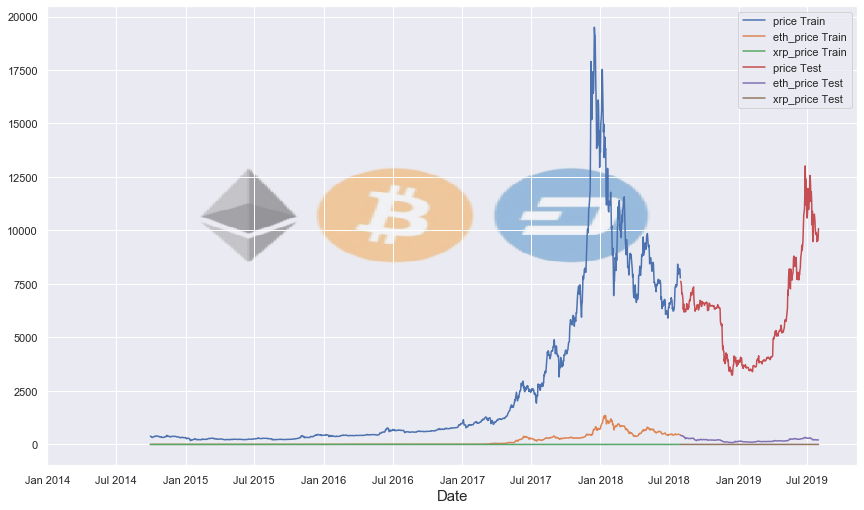

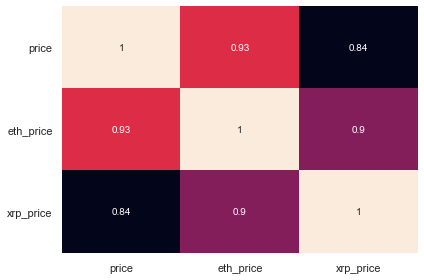

Loading From Path: Model no.  1


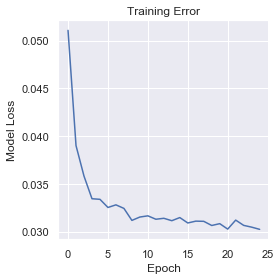

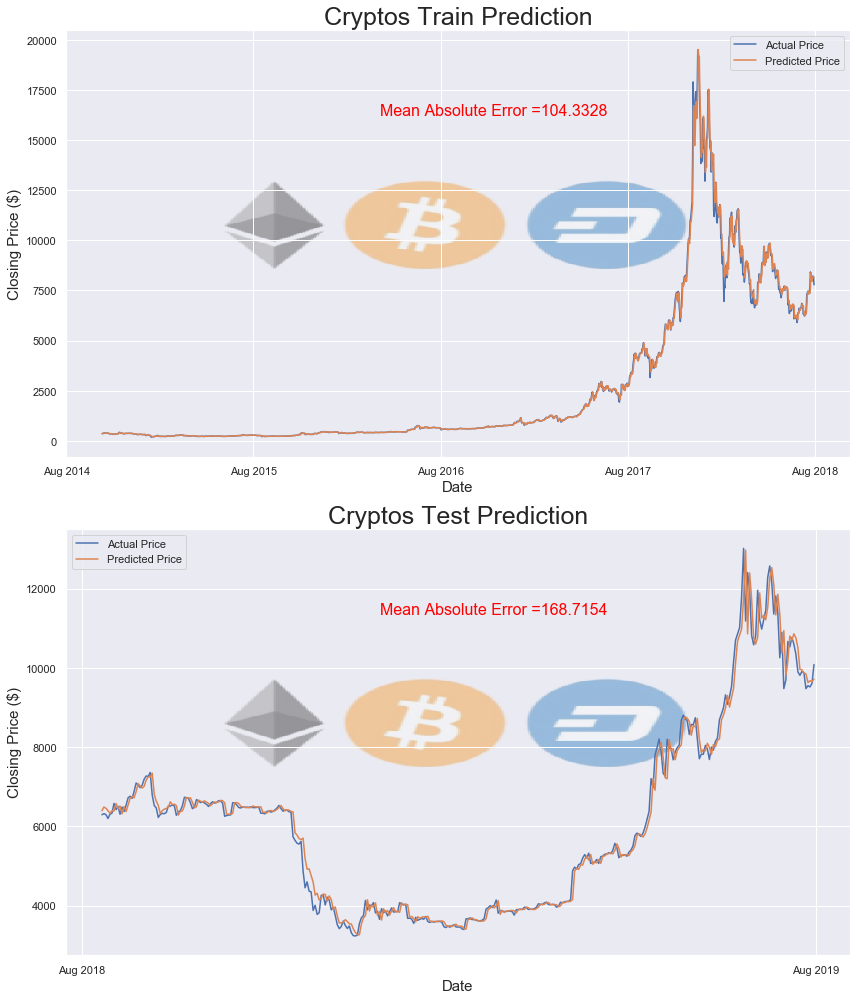

Loading From Path: Model no.  2
Loading From Path: Model no.  3
Loading From Path: Model no.  4
Loading From Path: Model no.  5
Loading From Path: Model no.  6
Loading From Path: Model no.  7
Loading From Path: Model no.  8
Loading From Path: Model no.  9
Loading From Path: Model no.  10


In [16]:
run_full_pipeline('Cryptos', 'get_coins_price_data', crypto_logo)

We can see in the prices plot that *Etherum* picked and crashed along with Bitcoin (though in a much smaller scale), and that *Ripple* is unlikely to add useful information, since its miniscule price is comparatively fixed (as can be seen better [here][1])

It’s well known that cryptos are heavily correlated- they tend to spike and crash collectively, and we can see that in the correlation table.

The loss function converged fast and remain fixed other than the standard exploration attempts.

The resulting prediction graph is very similar to the previous one, where the predictions were based solely on Bitcoin's historical performances.


### Stock Prices <a class="anchor" id="Stock-Prices"></a>

Using other cryptocurrencies to predict Bitcoin's price is akin to adding just more historical data, since the crypto market tend to move together. So let's try adding some outside information, starting with the most obvious analog: the stock market.

With their market caps and closing prices, cryptocurrencies somewhat resemble traditional company stocks. It is known that the direction of the stock-market can have an influence on seemingly unrelated subjects. Maybe the optimism/pessimism in the market, as reflected in the trading of the big stock indexes (Dow-Jones, Nasdaq, S&P 500) contains hidden information on Bitcoin's price, which our model can detect.

[1]: https://coinmarketcap.com/currencies/ripple/

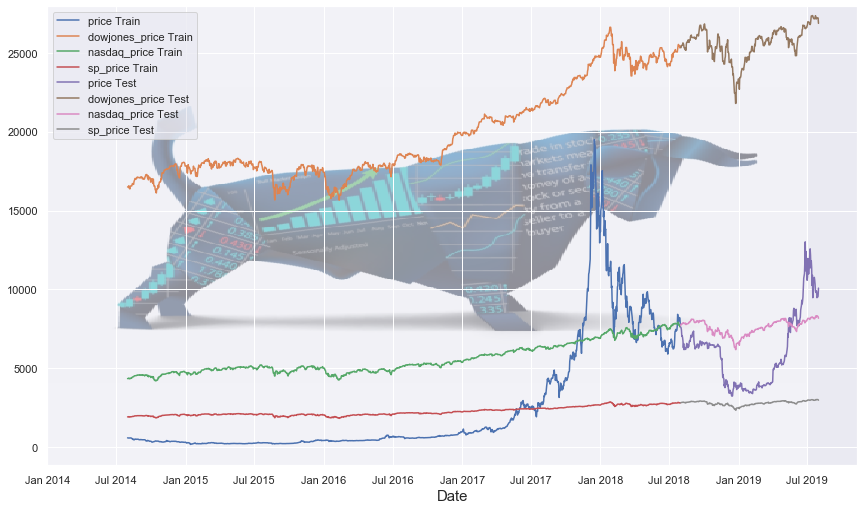

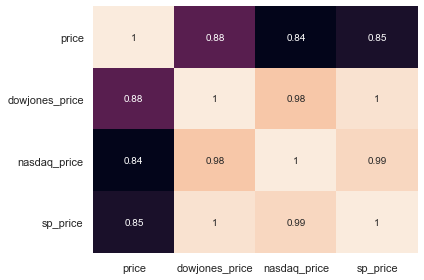

Loading From Path: Model no.  1


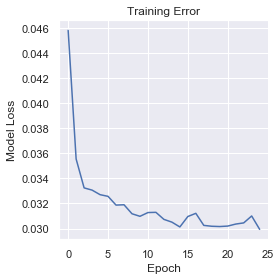

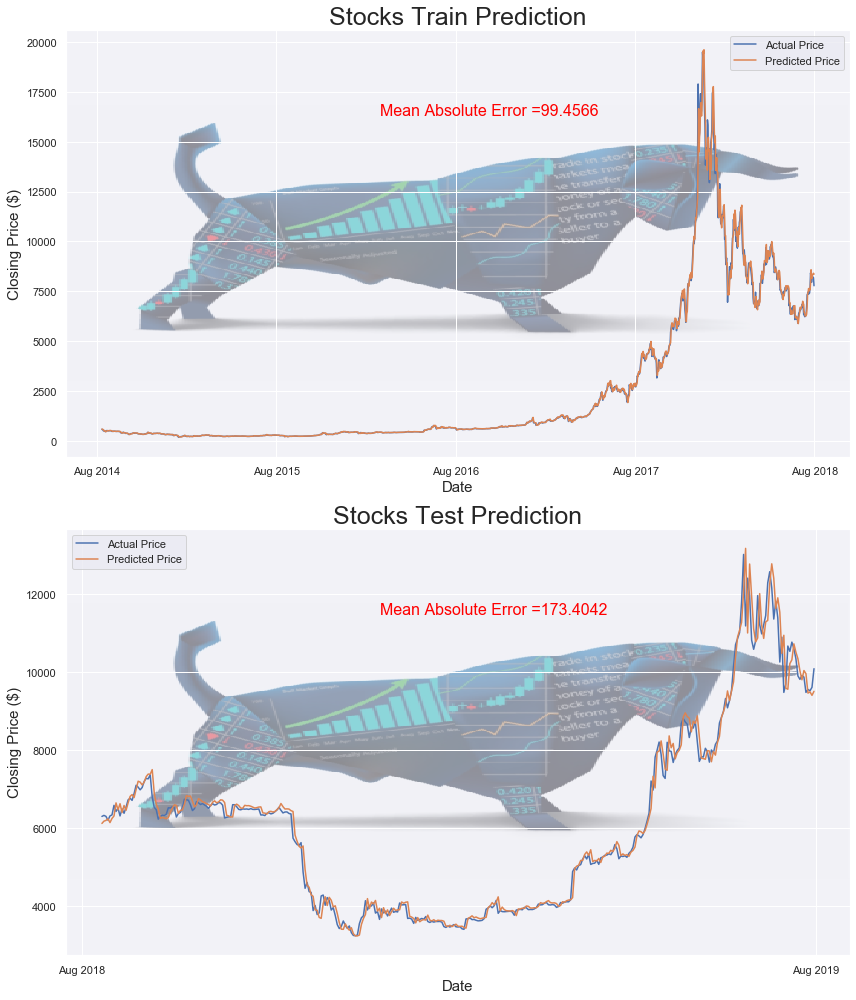

Loading From Path: Model no.  2
Loading From Path: Model no.  3
Loading From Path: Model no.  4
Loading From Path: Model no.  5
Loading From Path: Model no.  6
Loading From Path: Model no.  7
Loading From Path: Model no.  8
Loading From Path: Model no.  9
Loading From Path: Model no.  10


In [17]:
run_full_pipeline('Stocks', 'get_stocks_price_data', stocks_logo)

Plotting the data reveal a much weeker connection between the stock index's value and the price of Bitcoin, though the big rise (Jan 18) and fall (Jan 19) did seem to somewhat correlate.

Surprisingly, the Pearson-values shows a quite strong correlation (not suprisingly, the stock indexes strongly correlate with each other as they all pretend to give a 'meta' evaluation of the market), which could indicate that our hypothesis regarding Bitcoin price being affected by the market changes have some merit.

The model took a bit longer to converge, and the noticable difference in the prediction graph is that now the model consistently overestimate (though barely) the projected price and seems to track better the "shape" of the price-curve.

### Commodity Prices <a class="anchor" id="Commodity-Prices"></a>

What is Bitcoin? this a-la philosophical question has real [consequences][1], and it stem from the fact that cryptocurrency is still a new animal, which doesn't feet squarely in the existing financial framework.

The on-going debate is whether Bitcoin should be considered a [stock, or a commodity][2]. the [prevailing opinion][3] (backed by a [US judge][4]) is that [Bitcoin is a connodity][5], so maybe the time-series of other commodities prices - metals, in particular - can tell us something. Let's check:

[1]: https://www.marketwatch.com/story/why-it-matters-if-bitcoin-is-a-currency-or-a-commodity-2017-12-13
[2]: https://www.bitcoinmarketjournal.com/bitcoin-commodity/
[3]: https://bitcoinexchangeguide.com/bitcoin-classification-as-a-commodity-or-a-stock-top-crypto-assets-type/
[4]: https://www.cnbc.com/2018/03/07/cryptocurrencies-like-bitcoin-are-commodities-us-judge-rules.html
[5]: https://medium.com/@craig_10243/bitcoin-is-a-commodity-1635dfca32fd

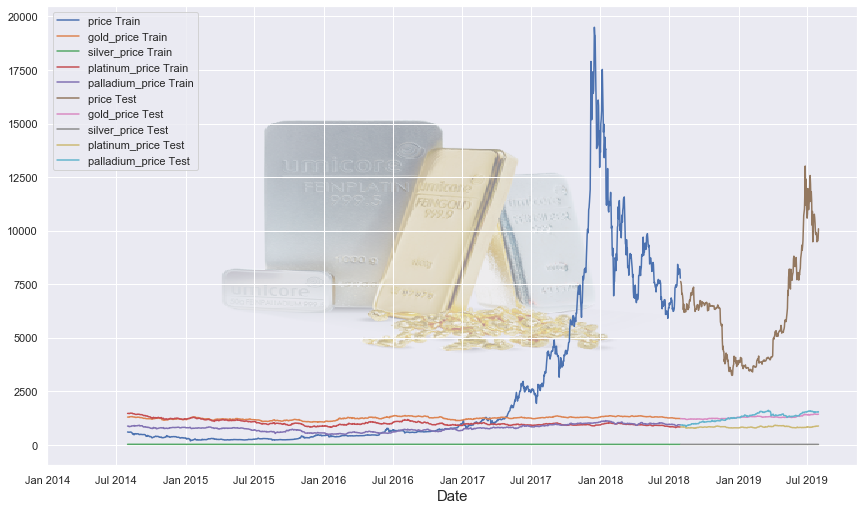

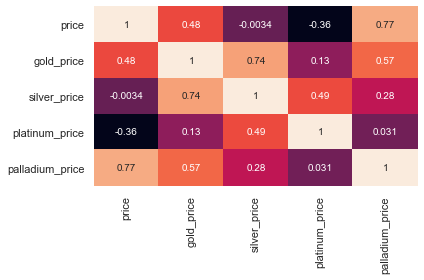

Loading From Path: Model no.  1


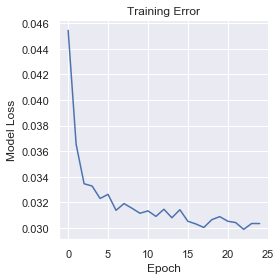

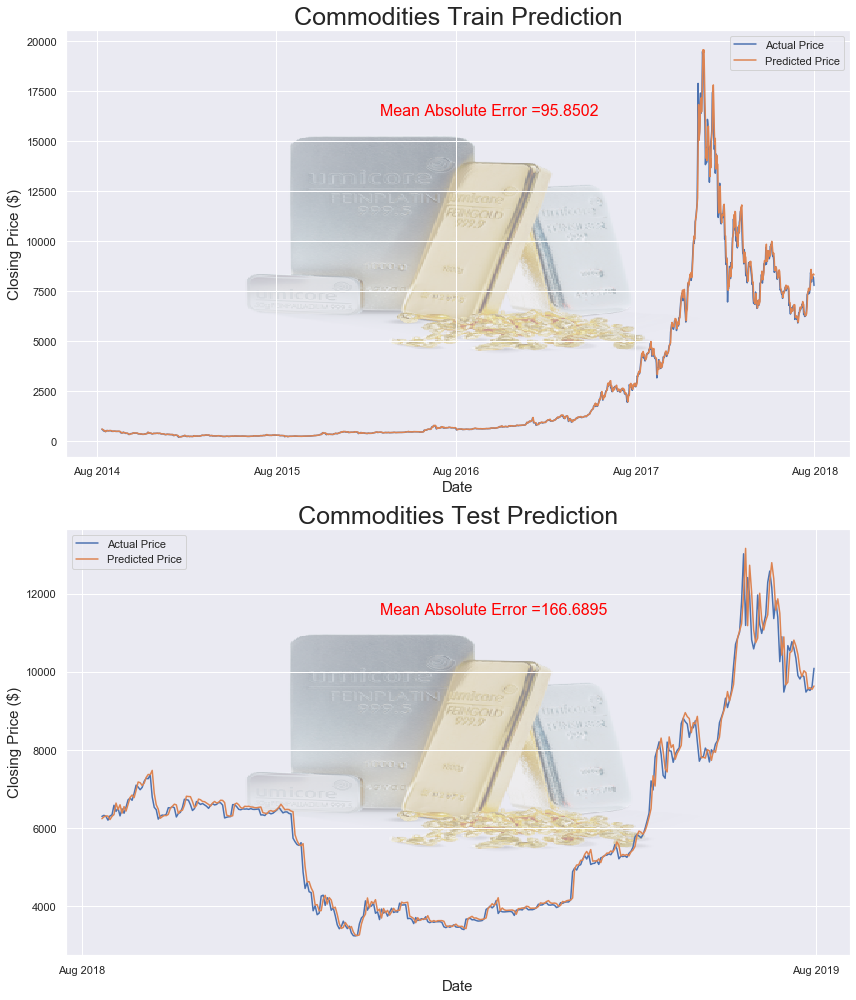

Loading From Path: Model no.  2
Loading From Path: Model no.  3
Loading From Path: Model no.  4
Loading From Path: Model no.  5
Loading From Path: Model no.  6
Loading From Path: Model no.  7
Loading From Path: Model no.  8
Loading From Path: Model no.  9
Loading From Path: Model no.  10


In [18]:
run_full_pipeline('Commodities', 'get_commodities_price_data', metals_logo)

First, both to the naked eye and by the Pearson correlation coefficient, Bitcoin doesn't correlate with the market-value of metals. Does it mean that its classification as a commodity is wrong? no, beacuse we can see that metals don't generally correlate with each other.

The Training and the prediction curve is similar to the stock's model, so not much to add.

### Google Trends <a class="anchor" id="Google-Trends"></a>

Let's shift gears. So far we focused on financial elements (i.e. prices) as our features. but real-life data is far more rich then a trading spreadsheet.

Looking closely on the Bitcoin price-curve, we can see it tripled in value between November 15th and December 15th 2017. Around that time, Bitcoin (and the wider blockchain industry) received considerable mainstream [attention][1] which led to this bull run. Presumably, this attracted quite alot of new crypto investors (i.e gamblers), which propelled the price even higher. Well, what’s the first thing you’re gonna do after reading an [article][2] about this fancy futuristic blockchain that’s making people rich?. You’d google it.

The number of Google queries about a particular subject can be a good proxy to the subject's interest in the public, which in turn could (and should) have a bearing on its attributed, e.g. its price in the case of Bitcoin.

We've used `pytrends` library to retrieve data from [google trends][3]. Google trends normalizes the number of searches for the requested period between 0 and 100. Since we stiched several queries together, we normalised all of the data to a unified scale. more details can be seen in the code of `get_keywords_search_data` function in `DataLoader`.

Let's see if combining historical data about the popularity of the queries containing the keywords **Bitcoin**, **Cryptocurrency** and **Blockchain** can provide any indication to the oscillations in Bitcoin's price.

[1]: https://www.theguardian.com/business/live/2017/dec/07/pound-sterling-ftse-brexit-bitcoin-economics-business-live
[2]: https://www.nytimes.com/2018/01/13/style/bitcoin-millionaires.html
[3]: https://trends.google.com/trends/

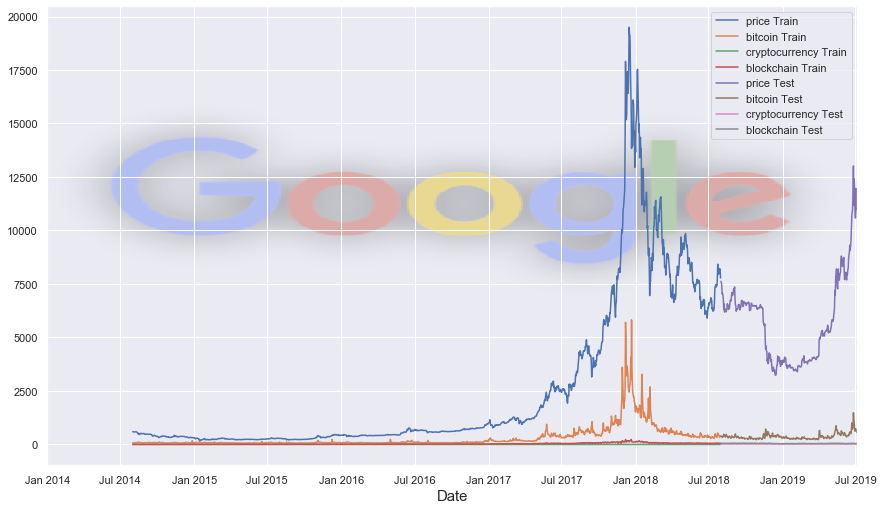

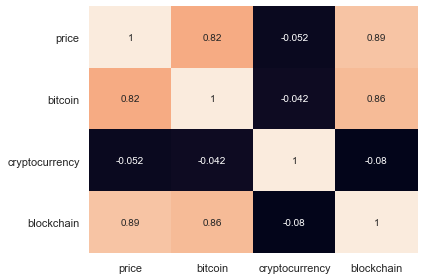

Loading From Path: Model no.  1


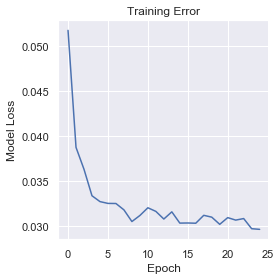

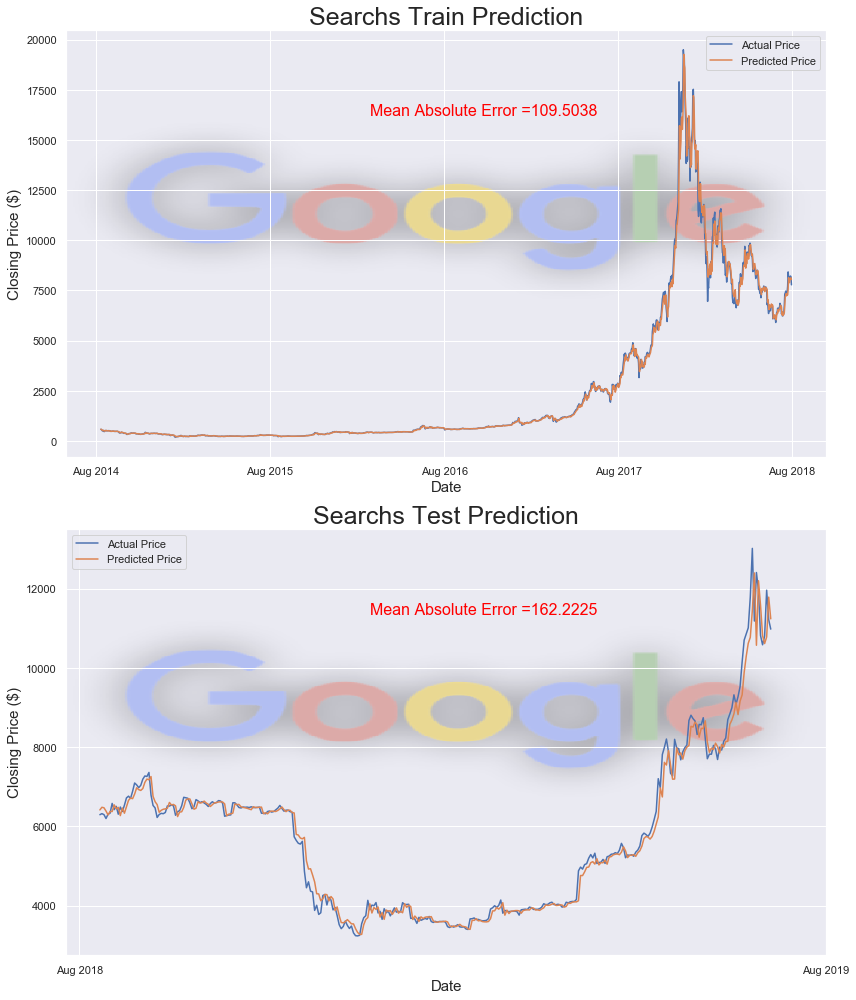

Loading From Path: Model no.  2
Loading From Path: Model no.  3
Loading From Path: Model no.  4
Loading From Path: Model no.  5
Loading From Path: Model no.  6
Loading From Path: Model no.  7
Loading From Path: Model no.  8
Loading From Path: Model no.  9
Loading From Path: Model no.  10


In [ ]:
run_full_pipeline('Searchs', 'get_keywords_search_data', google_logo)

It’s visually obvious and statisically clear that there’s a strong correlation between google searches of *bitcoin* and  the coin's price. This a well [known][1] [observation][2], what’s not so apparent is whether google search drives or follows the price.

The other terms seems to be irrelevant. *blockchain* search shows a slite uptick right around when bitcoin's price balooned and is correlated with the other features, but *cryptocurrency* doesn't really have nothing to do with anything. Maybe people just don't know how to spell it.

Both the training convergence and the prediction graph looks similar to that of the historical Bitcoin model, with the same pattern of missing "sharp" edges.

### Final Analysis <a class="anchor" id="Final-Analysis"></a>
Let's compare the models accuracy to the baseline models (single-point random model, and using just the historical Bitcoin data):

[1]: https://www.businessinsider.com/bitcoin-price-correlation-google-search-2017-9?r=UK
[2]: https://www.express.co.uk/finance/city/911979/Cryptocurrency-Google-search-bitcoin-boom-ethereum-price-warning-boost

In [ ]:
plot_boxplot(mae_dict.values(), mae_dict.keys())

Let's cut right to the chase: nothing **really** worked. While all models have comfortably beaten the random model, it's hardly a feat to boast about. Adding all kind of features (other then google trends, which we'll expand on in a minute) had only a miniscule affect on accuracy, which mean that they're likely irrelevant for predicting the price of Bitcoin.

The google trends data is different. using it gave the model meaningful improvements in its average MAE and appear to be quite relevant. It's not a suprise. Bitcoin (and cryptocurrencies in general) are not like the stock market (where prices are linked to hitting financial targets e.g. quarterly earnings reports), or commodity trading (where prices are determined mostly by supply and demand) or any other known financial tool which have defined contributing factors that can be modeled.

Cryptos are currently powered by [hope and aspirations][2] (well, [hype][3] and [speculation][1]) around blockchain technology, in a market that is constantly changing with [new players][4] and is still in [Regulatory flux][5]. If hype is a contributing factor, it's logical that measuring that hype (through google trend data) will help predict the price itself.

The next logical step was adding more hype-related data. We tried using Reddit-based metrics, i.e. using the number of subscribers to the [prominent bitcoin subthreads][6] as a feature, but missing data (Mar 18 to Jun 19) in the [stats site][7] sabotaged our efforts. We also moved to incorporate twitter data, relying on this [blog-post][8], but  encountered all kind of technical difficulties.

For now, we leave you with this important conclusion: if you're trying to identify relevant features for predicting the price of Bitcoin, you should remember that Bitcoin is a fiction of the public imagination ([like all money][9], except it's not backed by a government or a bank), so predicting is more similar to election polling then predicting the future price of oil.

[1]: https://hackernoon.com/blockchain-applications-and-its-future-f42fee305873
[2]: https://www.nytimes.com/2018/12/04/opinion/blockchain-bitcoin-technology-revolution.html
[3]: https://www.theguardian.com/technology/2018/mar/10/blockchain-music-imogen-heap-provenance-finance-voting-amir-taaki
[4]: https://www.wired.com/story/ambitious-plan-behind-facebooks-cryptocurrency-libra/
[5]: https://www.investopedia.com/news/bitcoin-government-regulations-around-world/
[6]: https://www.reddit.com/r/CryptoCurrency/comments/8q2o4d/comprehensive_list_of_top_cryptocurrency/
[7]: https://redditmetrics.com/r/BitcoinMarkets
[8]: https://medium.com/swlh/predict-bitcoin-by-reading-tweets-87e99d251fe6
[9]: https://www.investopedia.com/insights/what-is-money/

## Summary <a class="anchor" id="Summary"></a>

### Our Experiments <a class="anchor" id="Our-Experiments"></a>

We hope we succeeded in making this project free-flowing and fun to read, and not just descriptions of experiments and results. Let's now summarize the discrete experiments:

We first checked **if our data fulfill the assumption of normality**, and than constructed a **random-walk model** to serve as benchmark. Doing so, we've learnet about the **distinction between single-point and full-interval models**, and why a close prediction one point into the future doesn't necessity mean much.

Then we got to work on our on model. We **built our model** and trained it on **historical data (price and volume)**. Then we tried **making our data stationary** and adding some manual features, and saw that it led to **great improvement in accuracy**. lastly, we examined our model in-depth by looking at the **prediction graph for one month** and comparing the model's predictions to **1-lag model**, which helped us realize that our model isn't that sophisticated and under-preform the simple prediction of last day's closing price.

In the second part, we tried training our model with different features, like **other Cryptocurrencies Prices**, **Stock market data**, **Commodity prices** and **Google trends data**. we plotted the data and **examined the correlations** between the different features, re-trained our model on each catogery of features, and **compared the performances** of the various models. from this comparsion we concluded that **the financial data wasn't helpful** but the **Google trends data did lead to an improvement**, and offered our explanation for the results.

### Future Work <a class="anchor" id="Future-Work"></a>

* **Change loss function**: MAE doesn't really encourage risk taking. For example, under mean squared error (MSE), the LSTM model would be forced to place more importance on detecting spikes/troughs.

* **Hyper-parameter tuning**: If you believe the underlying data contain the answer, but our model just fails to capture it, it's possible that more layers, different activation function and so on can unlock the predictor you desire.

* **Expansion to more external data**: If google searches data improved the model's accuracy, maybe more "public opinion"-oriented data could boos the results even more. Using setiment analysis on Twitter, Reddit, etc. is the first idea that comes to mind, but there's plenty of other metrics that can be valuable.

* **Combination of features**: we only tried every feature in a stand-alone model. why not combine all of them? and maybe even add more! sometimes, the picture becomes clear only when all the parts are present.


### Closing Remarks <a class="anchor" id="Closing-Remarks"></a>

I hope you've detected our scepticism when it comes to applying deep learning to predict changes in Bitcoin prices. We tried letting the results lead us and not our intuition, but as our work on the project progressed, and we dove deeper into the world of cryptucurreny, we realised that predicting such unstable market is similar to predicting if a certain haircut will be cool next year. We can throw some data on the problem (e.g. the number of Holywood actors with an afro) that will lead to minor improvements, but we aren't really gonna decode how public opinion shifts are hapenning.

here's what **David Shean** [wrote][1]:
> The negative reality is that it's entirely possible that there is no detectable pattern to changes in crypto prices; that no model (however deep) can separate the signal from the noise (similar to the merits of using deep learning to predict earthquakes). And any pattern that does appear can disappear as quickly (see efficient market hypothesis). Just think how different Bitcoin in 2016 is to craze-riding Bitcoin of late 2017. Any model built on 2016 data would surely struggle to replicate these unprecedented movements. All of this suggests you might as well save yourself some time and stick to autoregression (unless you're writing a blog, of course).

As [this post][2] explain, getting good results with single-point LSTM doesn't mean much, and even if it did, the [Efficient Market Theory][3] explains why it's not gonna be useful, as explained eloquently in this thread:

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">There are lots of blog posts out there claiming to teach you how to use deep learning (typically RNNs) to predict stock prices, FX rates, BTC price, from past price data. Is it actually possible?<br><br>Well, mostly not. A thread.</p>&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/1177633367472259072?ref_src=twsrc%5Etfw">September 27, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Bitcoin is not a stock, not a currency, not a bond, not a house, not a cow. People someday got excited about it, and then they weren't anymore. Measuring public interest (like we did with the Google trends data) can help us **recognize** such patterns as they're happening, but probably won't be enough to **predict** them.

By its design as decentralized system, Bitcoin is worth whatever people decide it's worth, and people once decided that fanny packs are cool. It's tempting to look at the Google-trends results and believe that monitoring the global discussion could hold the key, but When it comes to Bitcoin, the old question of the chicken and the egg gets new manifestation: does the public interest causes a shift in the price of Bitcoin or is it the other way around?

[1]: https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb
[2]: https://hackernoon.com/dont-be-fooled-deceptive-cryptocurrency-price-predictions-using-deep-learning-bf27e4837151
[3]: http://news.morningstar.com/classroom2/course.asp?docId=4495&page=2&CN=C